# Blob detection

In [1]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from iaf.plot import imshow
from iaf.notebook import init_style
init_style()

In this quick demo, we will extract blobs from the Hubble Deep Field image using the **Laplacian of Gaussian (LoG)** and the **Difference of Gaussians** detectors.

Let's load and display (a subset of) the Hubble Deep Field image.

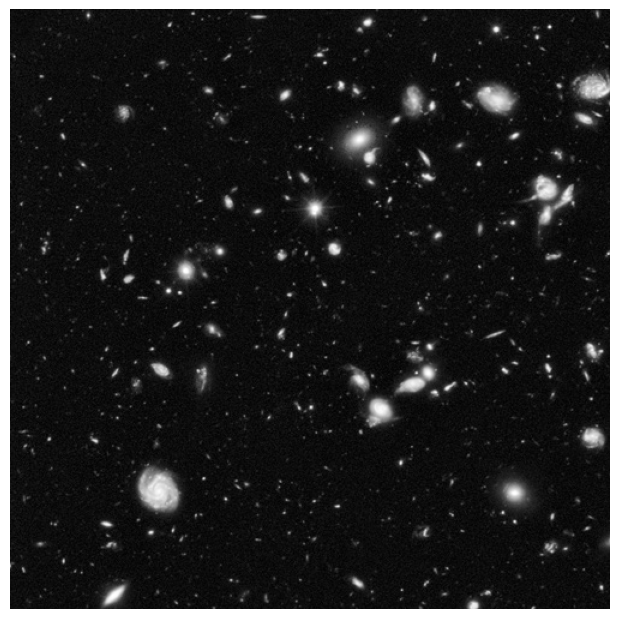

In [2]:
image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)
imshow(image_gray)

We now initialize the **Laplacian of Gaussian (LoG)** detector from the `skimage.feature` package.
The `blob_log` function takes several parameters; in particular, the `min_sigma`, `max_sigma` and `num_sigma` are interesting. All three parameters are optional. The function can extract blobs at `num_sigma` different scales, linearly increasing $\sigma$ from `min_sigma` to `max_sigma`.

One can obtain help about any function by typing `?` followed by the function name.

In [3]:
?blob_log

Signature:
blob_log(
    image,
    min_sigma=1,
    max_sigma=50,
    num_sigma=10,
    threshold=0.2,
    overlap=0.5,
    log_scale=False,
    *,
    threshold_rel=None,
    exclude_border=False,
)
Docstring:
Finds blobs in the given grayscale image.

Blobs are found using the Laplacian of Gaussian (LoG) method [1]_.
For each blob found, the method returns its coordinates and the standard
deviation of the Gaussian kernel that detected the blob.

Parameters
----------
image : ndarray
    Input grayscale image, blobs are assumed to be light on dark
    background (white on black).
min_sigma : scalar or sequence of scalars, optional
    the minimum standard deviation for Gaussian kernel. Keep this low to
    detect smaller blobs. The standard deviations of the Gaussian filter
    are given for each axis as a sequence, or as a single number, in
    which case it is equal for all axes.
max_sigma : scalar or sequence of scalars, optional
    The maximum standard deviation for Gaussian ker

In [4]:
# Run the `blob_log` function
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log

array([[401.        , 123.        ,  10.66666667],
       [199.        , 270.        ,   4.22222222],
       [334.        , 308.        ,   7.44444444],
       ...,
       [108.        , 259.        ,   1.        ],
       [375.        , 333.        ,   1.        ],
       [ 46.        , 131.        ,   1.        ]])

The returned array contains the x and y positions, and the $\sigma$ of detection of all detected blobs, one per row. From $\sigma$, the radius of the blobs can be calculated as $\sigma \cdot sqrt(2)$.

In [5]:
# We compute the radii from the 3rd columns (indexing is 0-based)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

We can now do the same with the **Difference of Gaussians (DoG)** detector `blob_dog`.

In [6]:
?blob_dog

Signature:
blob_dog(
    image,
    min_sigma=1,
    max_sigma=50,
    sigma_ratio=1.6,
    threshold=0.5,
    overlap=0.5,
    *,
    threshold_rel=None,
    exclude_border=False,
)
Docstring:
Finds blobs in the given grayscale image.

Blobs are found using the Difference of Gaussian (DoG) method [1]_, [2]_.
For each blob found, the method returns its coordinates and the standard
deviation of the Gaussian kernel that detected the blob.

Parameters
----------
image : ndarray
    Input grayscale image, blobs are assumed to be light on dark
    background (white on black).
min_sigma : scalar or sequence of scalars, optional
    The minimum standard deviation for Gaussian kernel. Keep this low to
    detect smaller blobs. The standard deviations of the Gaussian filter
    are given for each axis as a sequence, or as a single number, in
    which case it is equal for all axes.
max_sigma : scalar or sequence of scalars, optional
    The maximum standard deviation for Gaussian kernel. Keep t

In analogy to the parameters for the `blob_log` function, also the `blob_dog` function allows specifying a range of sigma values from `min_sigma` to `max_sigma`. The ratio of the two $\sigma$ for the detector is specified with the `sigma_ratio` parameter.

In [7]:
# Run the `blob_dog` function
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)

Again, we calculate the radius of the blobs as $\sigma \cdot sqrt(2)$.

In [8]:
# We compute the radii from the 3rd columns (indexing is 0-based)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

Now we are ready to plot the results.

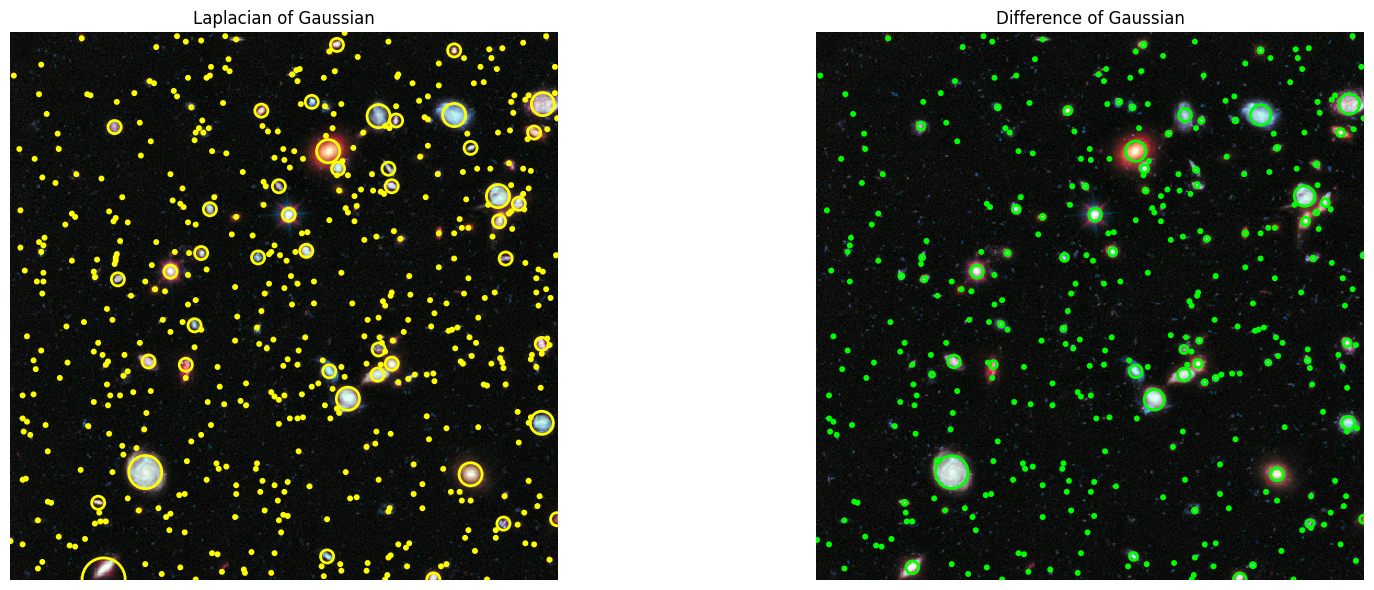

In [9]:
blobs_list = [blobs_log, blobs_dog]
colors = ['yellow', 'lime']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True, sharey=True, subplot_kw={'adjustable': 'box'})
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()